<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/analisisHoras_MENSUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pylab import *

In [ ]:
datos=pd.read_csv("GOLD-HastaMarzo15.xlsx")
datos=datos.iloc[:,[1,2,3]]
datos["precio"]=(datos.bid+datos.ask)/2
datos=datos.groupby("time").mean()
datos.index=pd.to_datetime(datos.index).strftime("%Y-%m-%d %H:%M")

In [ ]:
#datos.loc["2021-02-03 15:01":"2021-02-03 18:00"] RANGO DE FECHAS

In [ ]:
datos["time"]=pd.to_datetime(datos.index).strftime("%H:%M")
datos.index=pd.to_datetime(datos.index).strftime("%Y-%m-%d")

In [ ]:
lista_dias=datos.index.unique()
dia=[]
for i in range(len(lista_dias)):
  dia.append(datos.loc[lista_dias[i]].set_index("time")) 
  dia[i]=dia[i].groupby("time").mean()
  dia[i]["contar"]=range(1,len(dia[i])+1)
  
  
  # dia[i]=dia[i].reset_index()

array([1021])

In [ ]:
media_global=datos.precio.mean()

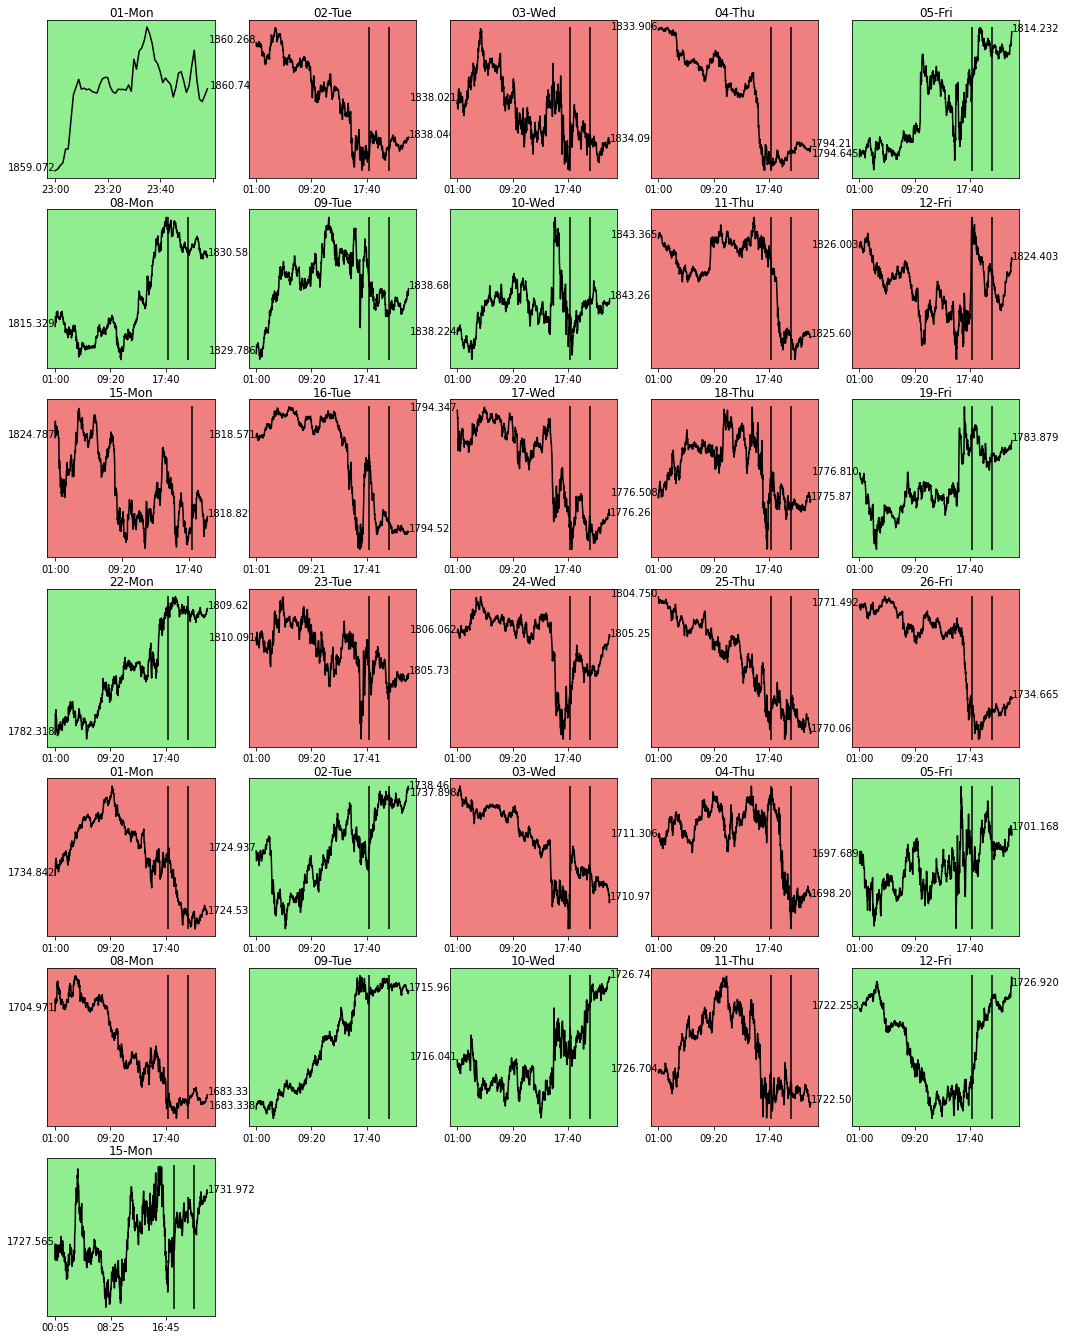

In [ ]:
mensual=figure(figsize=(20,20))
lista_maximos,lista_minimos,lista_promedios=[],[],[]
for i in range(len(lista_dias)):
  maximo=max(dia[i].ask)
  minimo=min(dia[i].bid)
  promedio=dia[i].values.mean()

  lista_maximos.append(maximo)
  lista_minimos.append(minimo)
  lista_promedios.append(promedio)

  if dia[i].precio[0]<dia[i].precio[-1]:
    color_fondo="lightgreen"
  else:
    color_fondo="lightcoral"
    
  subplot(7,5,i+1,frameon=True,yticks=[],facecolor=color_fondo)
  subplots_adjust(bottom=0.1, right=0.8, top=1)
  title(pd.to_datetime(lista_dias[i]).strftime("%d-%a"),fontdict={'verticalalignment': 'top'})
  
  
  dia[i].precio.plot(color="k",xlabel="")  
  # plot(dia[i].values,color="k")

  # text(0,maximo,"%.3f"%maximo,color="r",ha="right") #MAXIMO DEL DIA
  # hlines(maximo,0,len(dia[i]),colors="r")
  # text(0,minimo,"%.3f"%minimo,color="g",ha="right") # MINIMO DEL DIA
  # hlines(minimo,0,len(dia[i]),colors="g")
  # text(0,promedio,"%.3f"%promedio,color="b",ha="right") #PROMEDIO DEL DIA
  # hlines(promedio,0,len(dia[i]),colors="b") 
  # text(0,media_global,"%.3f"%media_global,color="b",ha="right") #PROMEDIO GLOBAL
  # hlines(media_global,0,len(dia[i]),colors="b") 
  vlines(dia[i][dia[i].index=="18:00"].contar,minimo,maximo,)
  vlines(dia[i][dia[i].index=="21:00"].contar,minimo,maximo,)
  text(0,dia[i].precio[0],"%.3f"%dia[i].precio[0],ha="right") #PRECIO APERTURA
  text(len(dia[i]),dia[i].precio[-1],"%.3f"%dia[i].precio[-1],ha="left") #PRECIO CIERRE

str